In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
from geobipy import StatArray
from geobipy import TopoRectilinearMesh2D
import matplotlib.pyplot as plt
import numpy as np

### Create input StatArrays for the horizontal and vertical (x and y) mesh axes

In [2]:
x = StatArray(np.arange(10.0), 'Easting', 'm')
y = StatArray(np.arange(10.0), 'Northing', 'm')

### Create a height profile for the mesh

In [3]:
height = StatArray(np.asarray([5,4,3,2,1,1,2,3,4,5])*3.0, 'Height', 'm')

### Instantiate the mesh

In [4]:
rm = TopoRectilinearMesh2D(xCentres=x, yCentres=y, heightCentres=height)

#### Plot only the grid lines of the mesh

<IPython.core.display.Javascript object>


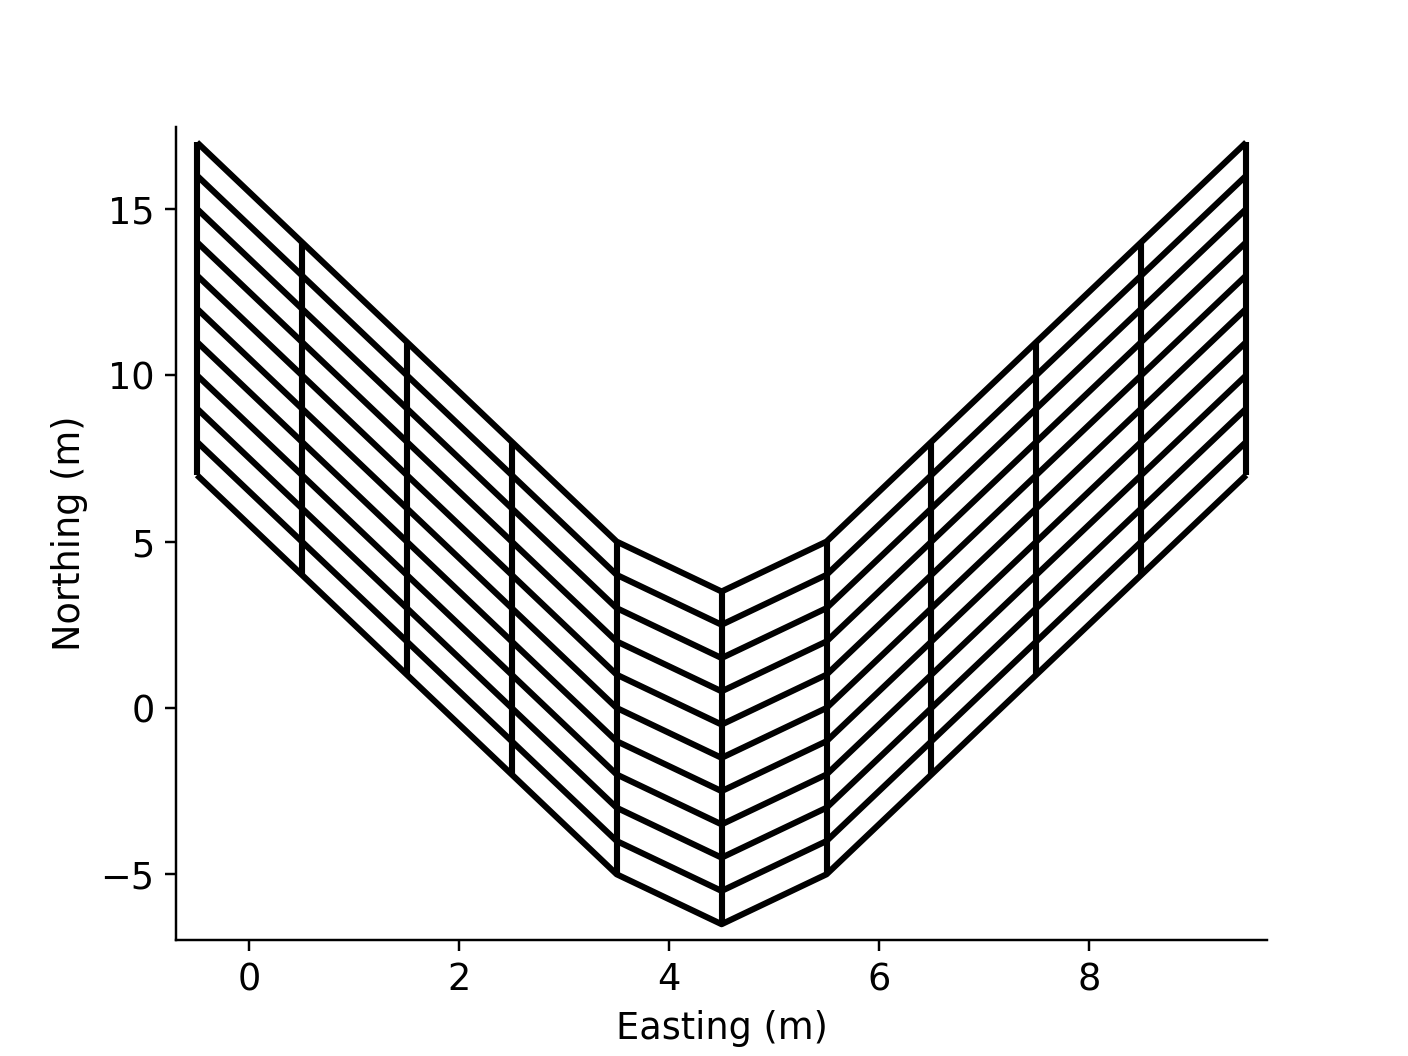

In [5]:
plt.figure()
rm.plotGrid()

### Create an array of random numbers that we can pass to the mesh and perform operations

In [6]:
values = StatArray(np.random.random(rm.dims), 'Name', 'Units')

### Compute the mean over an interval for the mesh.

In [7]:
rm.intervalMean(values, intervals=[6.8, 12.4], axis=0)

array([[0.68697157, 0.81907054, 0.69241705, 0.30238346, 0.27756424,
        0.3250959 , 0.72187494, 0.62686533, 0.23008408, 0.3933306 ]])

### Compute the mean over multiple intervals for the mesh.

In [8]:
rm.intervalMean(values, intervals=[6.8, 12.4, 20.0, 40.0], axis=0)

array([[0.68697157, 0.81907054, 0.69241705, 0.30238346, 0.27756424,
        0.3250959 , 0.72187494, 0.62686533, 0.23008408, 0.3933306 ],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan]])

In [9]:
rm.intervalMean(values, intervals=[2.8, 4.2], axis=1)

array([[0.88751063],
       [0.41634386],
       [0.19421646],
       [0.66782839],
       [0.48923334],
       [0.48263112],
       [0.40058692],
       [0.49549652],
       [0.36677028],
       [0.00765474]])

In [10]:
rm.intervalMean(values, intervals=[2.8, 4.2, 5.1, 8.4], axis=1)

array([[0.88751063, 0.90990777, 0.49252115],
       [0.41634386, 0.58313865, 0.44577714],
       [0.19421646, 0.47759176, 0.5381875 ],
       [0.66782839, 0.61379553, 0.38815493],
       [0.48923334, 0.23507617, 0.6735662 ],
       [0.48263112, 0.75961952, 0.55280379],
       [0.40058692, 0.25879787, 0.4019069 ],
       [0.49549652, 0.30131078, 0.67508993],
       [0.36677028, 0.53506419, 0.30919263],
       [0.00765474, 0.13891274, 0.59454179]])

In [11]:
rm.ravelIndices([[3, 4], [5, 5]])

array([35, 45])

In [12]:
rm.unravelIndex([35, 45])

(array([3, 4]), array([5, 5]))

<IPython.core.display.Javascript object>


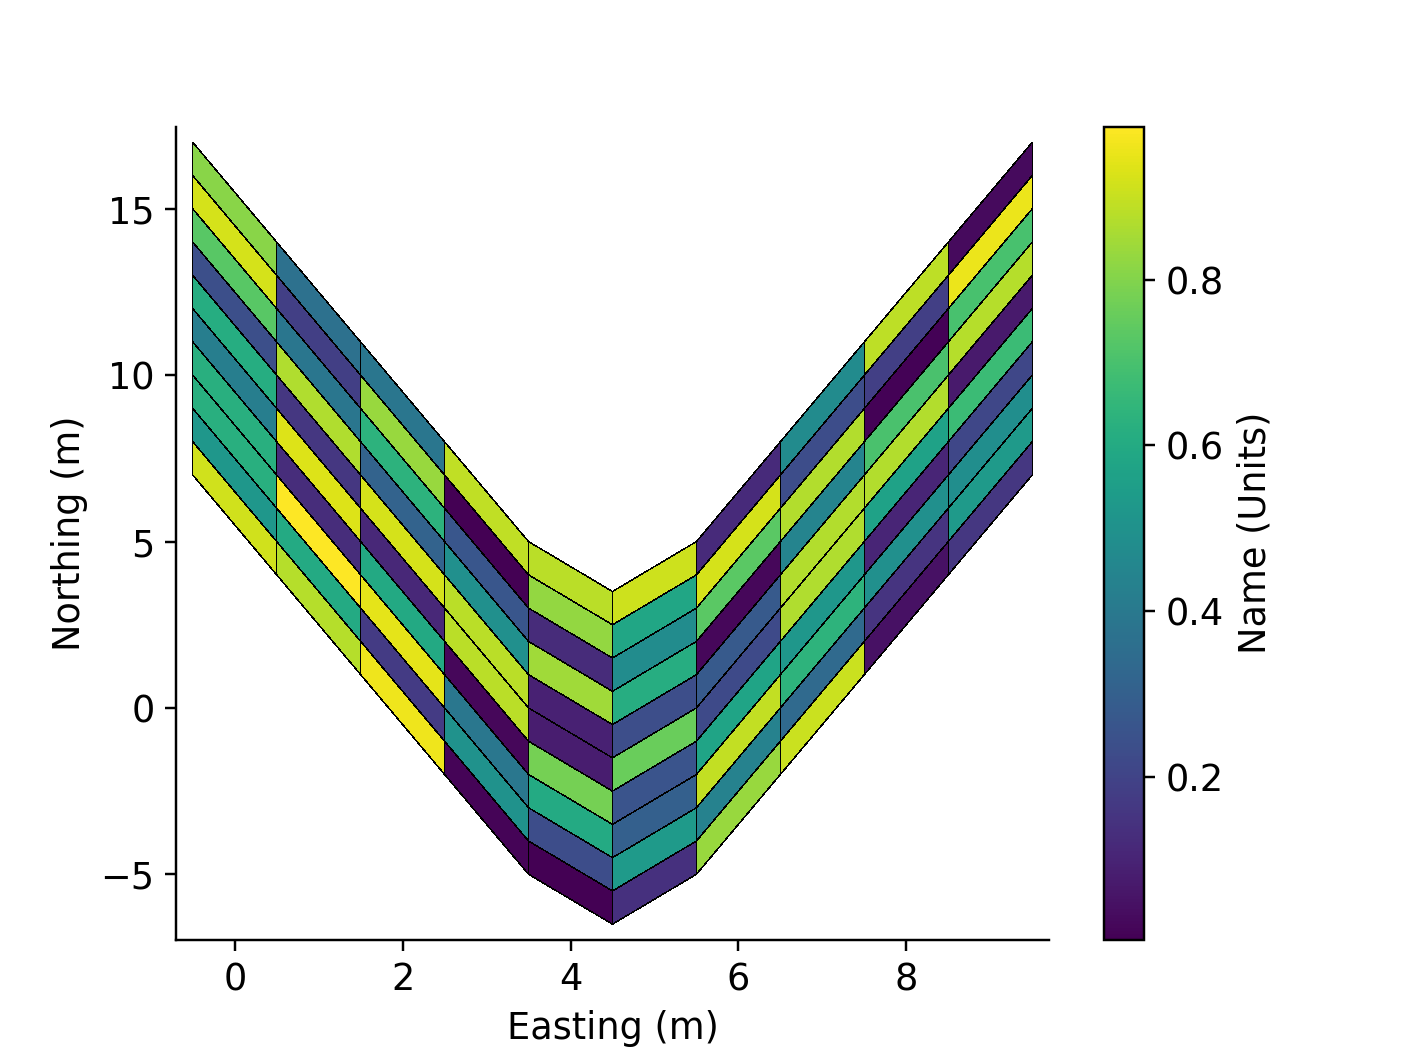

In [13]:
plt.figure()
rm.pcolor(values, grid=True, linewidth=0.1, xAxis='x')

### Create a line with three dimensions.

In [14]:
z = StatArray(np.cumsum(np.arange(10.0)), 'Depth', 'm')

In [15]:
rm = TopoRectilinearMesh2D(xCentres=x, yCentres=y, zCentres=z, heightCentres=height)
values = StatArray(np.arange(rm.nCells, dtype=np.float).reshape(rm.dims), 'Name', 'Units')

<IPython.core.display.Javascript object>


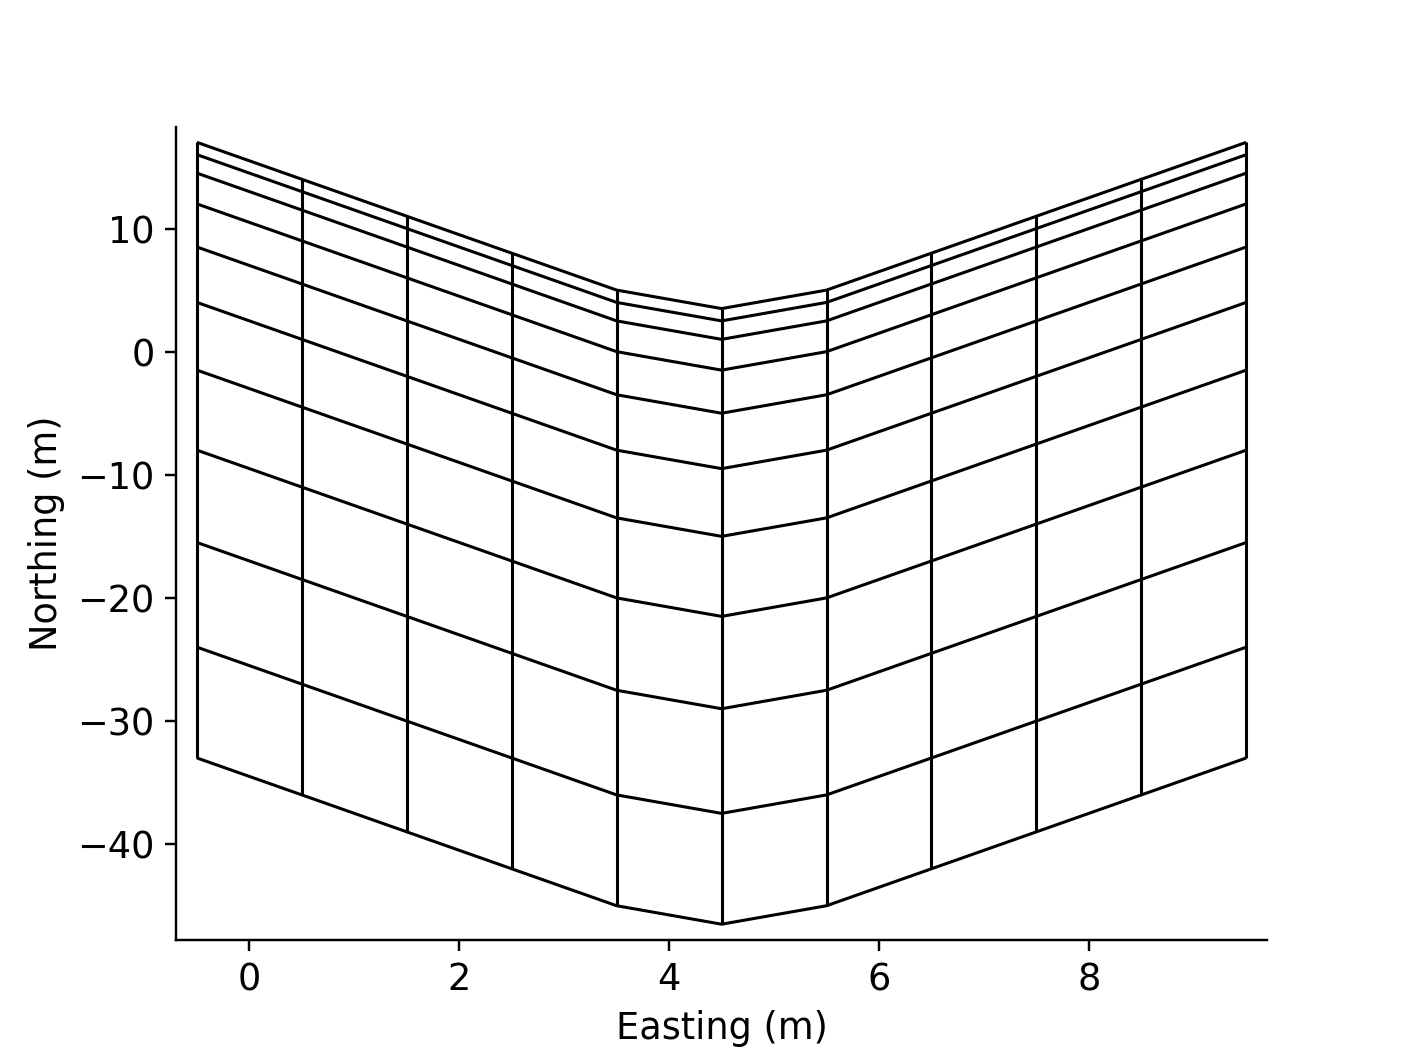

In [16]:
plt.figure()
rm.plotGrid(linewidth=1)

### The pcolor function can now be plotted against distance

<IPython.core.display.Javascript object>


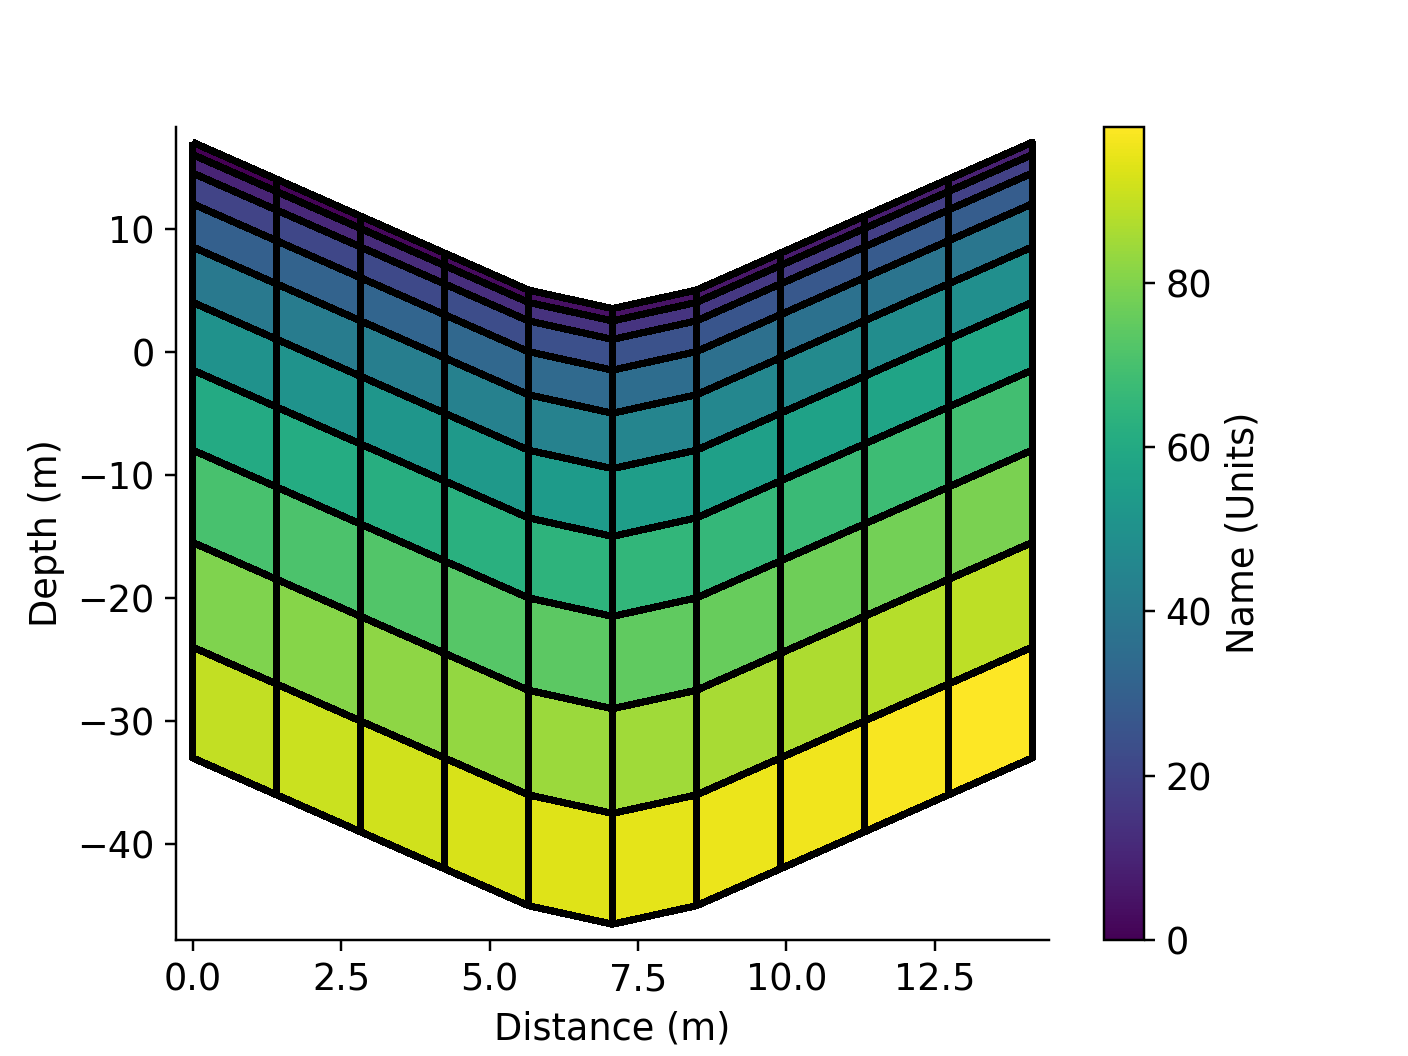

In [17]:
plt.figure()
rm.pcolor(values, grid=True, xAxis='r')

#### And we can plot the x-y co-ordinates

<IPython.core.display.Javascript object>


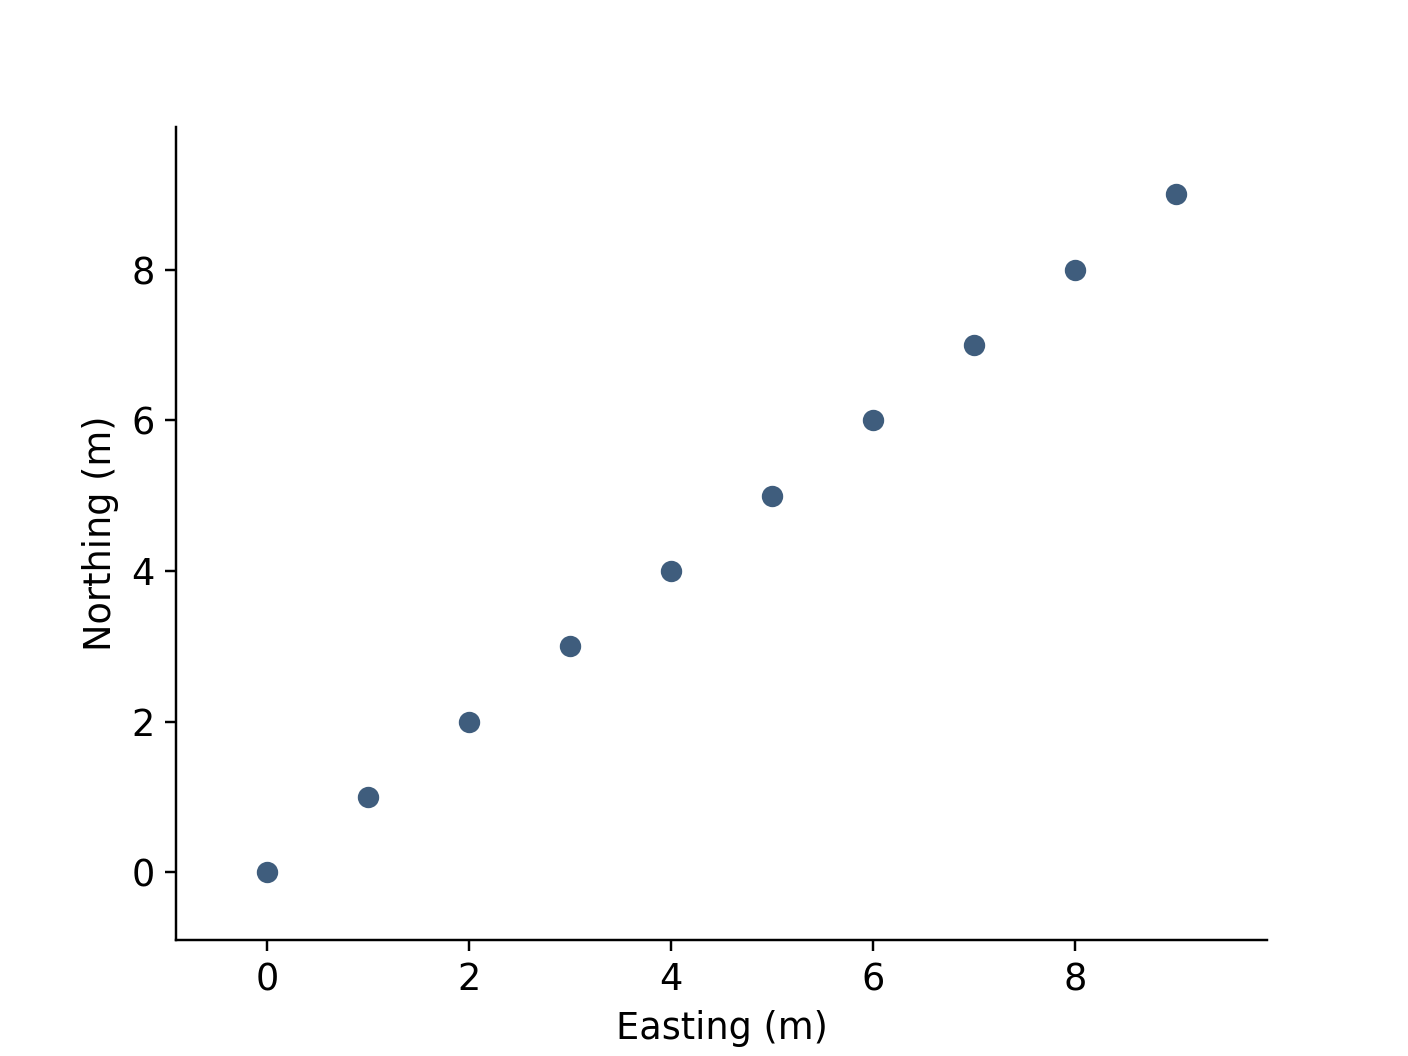

In [18]:
plt.figure()
rm.plotXY()

In [19]:
# x = StatArray(np.arange(3.0), 'Easting', 'm')
# y = StatArray(np.arange(3.0), 'Northing', 'm')
# z = StatArray(np.cumsum(np.arange(4.0)), 'Depth', 'm')
# height = StatArray(np.asarray([1,2,3])*10.0, 'Height', 'm')

In [20]:
# rm = TopoRectilinearMesh2D(xCentres=x, yCentres=y, zCentres=z, heightCentres=height)

In [21]:
rm.toVTK('test', cellData=values)